In [48]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import scipy.integrate as integrate
import math
import importlib
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\Daniel\Desktop\Radwatch\radwatch-analysis")

In [2]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\Daniel\\Desktop\\Radwatch\\radwatch-analysis\\ROI.py'>

In [3]:
import naa_isotope_analyzer as naa
importlib.reload(naa)

<module 'naa_isotope_analyzer' from 'C:\\Users\\Daniel\\Desktop\\Radwatch\\radwatch-analysis\\naa_isotope_analyzer.py'>

In [4]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-30min.Spe"
ecal_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\11-19-2019-Calibration.Ent"
bg_spec = Spectrum.from_file(r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\Background_Spectrum_12_20_19.Spe")
spec_01_30 = Spectrum.from_file(spec_filename)

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\Background_Spectrum_12_20_19.Spe
SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-30min.Spe


In [5]:
def apply_ecal(spec, ecal_filename):
    e_cal = np.loadtxt(ecal_filename)
    e_cal_energies=e_cal[:,0]
    e_cal_channels=e_cal[:,1]
    cal = bq.LinearEnergyCal.from_points(e_cal_channels,e_cal_energies)
    spec.apply_calibration(cal)
    return spec

In [6]:
def get_isotopes(spec):
    kernel = bq.GaussianPeakFilter(4250,30, fwhm_at_0=10)
    finder = bq.PeakFinder(spec, kernel)
    plt.figure()
    plt.plot(spec.counts_vals.clip(1e-1), label='Raw spectrum')
    plt.plot(finder._peak_plus_bkg.clip(1e-1), label='Peaks+Continuum')
    plt.plot(finder._bkg.clip(1e-1), label='Continuum')
    plt.plot(finder._signal.clip(1e-1), label='Peaks')
    plt.yscale('log')
    plt.xlim(0, len(spec))
    plt.ylim(3e-1)
    plt.xlabel('Channels')
    plt.ylabel('Counts')
    plt.legend()
    plt.tight_layout()
    
    finder.reset()
    finder.find_peaks(min_snr=10, xmin=50)
    print(finder.centroids)
    print(finder.snrs)

    plt.figure()
    plt.title('find_peaks')
    finder.plot()
    plt.tight_layout()
    
    energies = np.take(spec.bin_edges_kev,finder.centroids)
    hl_cut = 3600
    br_cut =4.0
    df = naa.naa_isotope_analyzer(energies.tolist(),hl_cut,br_cut)
    
    return df

In [7]:
spec_01_30 = apply_ecal(spec_01_30, ecal_filename)
bg_spec = apply_ecal(bg_spec, ecal_filename)

[1556.5, 1708.5, 1896.5, 2014.5, 2145.5, 2390.5, 2551.5, 3230.5, 4087.5, 4248.5, 4581.5, 4739.5, 5389.5, 6993.5, 8028.5, 8165.5]
[28.78040124987538, 39.69033246586671, 27.820371001108363, 13.347103825258186, 21.30580264657217, 40.03422006599558, 17.549257559385122, 15.199922835384445, 18.45685591563947, 194.41785622316573, 11.645442054907736, 23.059112618683272, 32.31203855531306, 49.03868224805949, 32.19398610040029, 28.380873368204792]
Backround isotopes [[], [], [], [], [], ['AC228'], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'CD117', 'IN114', 'SB122', 'CS134', 'CS134', 'HO166', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['AS76', 'RU105', 'AG110', 'TE131', 'CE143', 'ND149'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166', 'W187

,isotopes,energies,branching ratios
0,BR82,"[616.2815289275459, 695.3160317558285, 824.183...","[0.43700000000000006, 0.284, 0.242, 0.276, 0.2..."
1,AS76,[556.6088922539831],[0.45]
2,AC228,[773.0809040165884],[0.0149]
3,NA24,[1362.8243026308417],[0.999936]
4,ZN71,[508.3629306881238],[0.287]
5,K42,[1518.6714547942422],[0.1808]
6,TE131,[653.7356306694629],[0.0418]


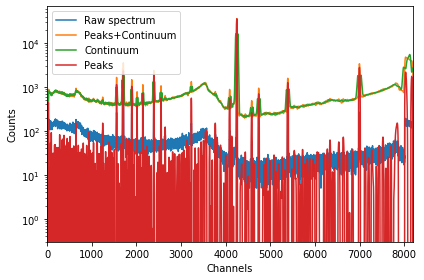

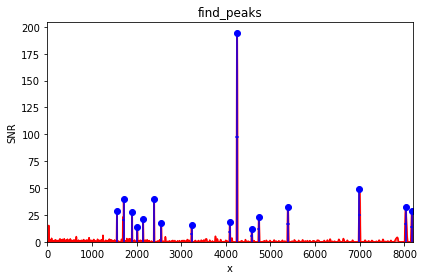

In [8]:
df = get_isotopes(spec_01_30)
df

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-3hr.Spe
[1246.5, 1558.5, 1710.5, 1897.5, 2016.5, 2146.5, 2392.5, 2553.5, 3232.5, 3771.5, 4091.5, 4253.5, 4586.5, 4743.5, 5395.5, 7000.5, 8029.5, 8165.5]
[23.528730632442592, 46.93161146496303, 76.29222549828924, 62.9123557942495, 26.903992324724147, 44.20969351104894, 85.397078056618, 39.00807430447638, 34.83141618248219, 14.274463511615455, 37.11716246811453, 298.5870765954211, 28.45386185603629, 31.166401253443922, 49.99336458607946, 75.5631122339882, 40.87122862521022, 34.53405224131057]
Backround isotopes [['AC228'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['GE77', 'GE77', 'RU105', 'ND149', 'EU152', 'HO166', 'LU177', 'LU177', 'HF179', 'AU198', 'PA232'], ['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'CD117', 'IN114', 'SB122', 'CS134', 'CS134', 'HO166', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', '

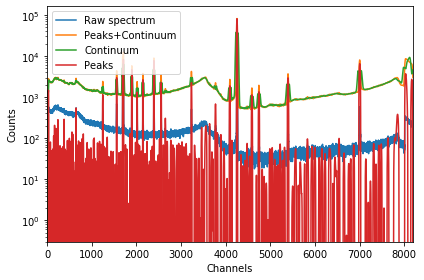

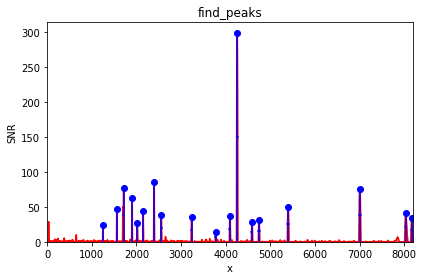

In [9]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-3hr.Spe"
spec_01_03 = Spectrum.from_file(spec_filename)
spec_01_03 = apply_ecal(spec_01_03,ecal_filename)
df2 = get_isotopes(spec_01_03)

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-24hr.Spe
[244.5, 381.5, 537.5, 785.5, 830.5, 1247.5, 1558.5, 1693.5, 1898.5, 2017.5, 2147.5, 2393.5, 2554.5, 3233.5, 3459.5, 4093.5, 4254.5, 4540.5, 4589.5, 5393.5, 7001.5, 8030.5, 8163.5]
[10.150018047984478, 11.404904801619672, 11.457975408490494, 11.844367942825437, 13.658770159983105, 39.821262386174816, 28.690671341841856, 65.28373442491728, 63.72752507414199, 16.348820144849036, 47.00558483692444, 86.43419059751872, 42.01501573819539, 41.97213529129092, 26.657601217420527, 40.24805071713955, 66.95579078093738, 20.372190528712167, 27.437117909628828, 10.020745795778726, 16.86813367473344, 13.17721899193074, 10.027539911146247]
Backround isotopes [[], [], ['U235'], [], ['TL208'], ['AC228'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['SE75', 'CD107', 'CD117', 'TE131', 'ND147', 'ND149', 'SM153', 'GD153', 'GD153', 'DY165', 'YB169', 'LU177', 'HF180', 'TA182', 'RE1

,isotopes,energies,branching ratios
0,BR82,"[551.8477776257733, 616.9163442113072, 695.950...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,TE131,"[91.92410454070705, 654.6878535951049, 1112.38...","[0.0766, 0.0418, 0.11]"
2,ZN71,"[135.40895147835653, 508.9977459718851]","[0.054000000000000006, 0.287]"
3,GE77,[263.6416387981403],[0.5329999999999999]
4,TL208,[277.9249826827697],[0.0631]
5,K40,[1455.5073340599924],[0.1066]
6,SE Unidentified,[1726.2560525841893],[[None]]
7,AC228,[410.283969347002],[0.0192]
8,NA24,[1364.7287484821256],[0.999936]
9,U235,[184.9245436117384],[0.572]


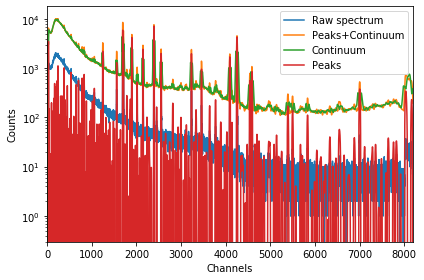

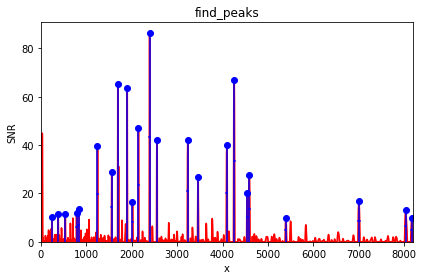

In [10]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-24hr.Spe"
spec_01_24 = Spectrum.from_file(spec_filename)
spec_01_24 = apply_ecal(spec_01_24,ecal_filename)
df3 = get_isotopes(spec_01_24)
df3

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-30min.Spe
[1556.5, 1692.5, 1896.5, 2145.5, 2390.5, 2551.5, 4088.5, 4249.5, 4739.5, 5390.5, 6995.5, 8029.5, 8165.5]
[21.164031107682014, 25.07575582119962, 22.344825026944086, 14.377120517846587, 28.33105189081124, 10.419249587878177, 11.323149491504754, 116.34104078428427, 26.495078358645973, 19.069668036271928, 28.13423765452399, 18.425726658018952, 17.049711068977835]
Backround isotopes [[], [], [], [], ['AC228'], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166', 'W187'], ['GA72', 'BR82', 'KR79', 'SN125', 'TE131', 'HO166'], ['

,isotopes,energies,branching ratios
0,BR82,"[551.5303699838927, 616.2815289275459, 695.316...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,AC228,[773.0809040165884],[0.0149]
2,NA24,[1363.1417102727223],[0.999936]
3,ZN71,[508.3629306881238],[0.287]
4,K42,[1518.6714547942422],[0.1808]


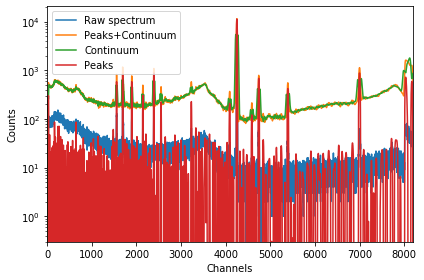

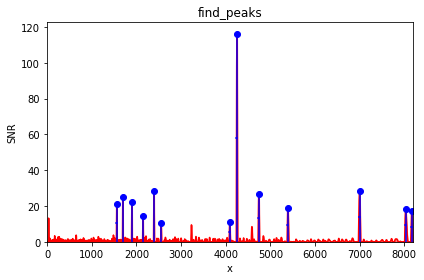

In [11]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-30min.Spe"
spec_02_30 = Spectrum.from_file(spec_filename)
spec_02_30 = apply_ecal(spec_02_30,ecal_filename)
df4 = get_isotopes(spec_02_30)
df4

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-3hr.Spe
[1555.5, 1690.5, 1894.5, 2143.5, 2388.5, 2549.5, 3227.5, 4085.5, 4245.5, 4578.5, 4735.5, 5386.5, 6990.5, 8029.5, 8165.5]
[32.87424278524475, 59.754205385448934, 48.35254204910319, 34.39962276745861, 64.32486646397145, 29.980304495269305, 25.950607055639125, 27.69674140878002, 186.83704465875496, 20.50438147610856, 39.50452864469816, 31.523371063558876, 47.9781364710439, 30.99463022144048, 25.739639025450455]
Backround isotopes [[], [], [], [], ['AC228'], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG108', 'AG110', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166', 

,isotopes,energies,branching ratios
0,BR82,"[550.8955547001314, 615.6467136437846, 694.681...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,AC228,[772.4460887328272],[0.0149]
2,NA24,[1361.8720797051997],[0.999936]
3,ZN71,[508.04552304624315],[0.287]
4,K42,[1517.4018242267198],[0.1808]


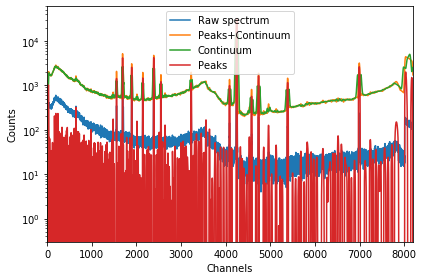

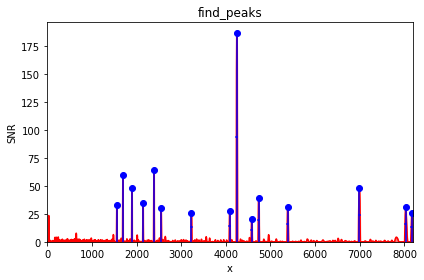

In [12]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-3hr.Spe"
spec_02_03 = Spectrum.from_file(spec_filename)
spec_02_03 = apply_ecal(spec_02_03,ecal_filename)
df5 = get_isotopes(spec_02_03)
df5

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-24hr.Spe
[704.5, 786.5, 832.5, 1561.5, 1697.5, 1787.5, 1901.5, 2150.5, 2396.5, 2558.5, 2819.5, 3238.5, 3342.5, 3464.5, 4098.5, 4260.5, 4549.5, 4597.5, 5505.5]
[10.334901529425142, 10.56085735911773, 15.55670420945118, 29.58987023626938, 48.600043099730414, 11.266421000392258, 37.40509999869032, 26.62707681747214, 50.71034482541158, 23.982529352184603, 10.236646072800884, 23.5231484106417, 10.614442848739918, 24.01395677491427, 23.67383324137367, 20.405103469104677, 24.024984296621014, 14.337123296339552, 10.153076365771584]
Backround isotopes [['PB212'], [], [], ['TL208'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['TE131', 'XE125', 'XE135', 'BA131', 'BA131', 'ND149', 'EU152', 'EU154', 'LU177', 'HF179'], ['GE75', 'GE77', 'SE75', 'MO93', 'RU105', 'TE131', 'BA133', 'BA133', 'BA135', 'ND149', 'ND149', 'LU177', 'HF179', 'TA182', 'BI210'], ['SE75', 'TE131', 'CE143', 'HO166', '

,isotopes,energies,branching ratios
0,BR82,"[553.1174081932959, 617.8685671369492, 696.903...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,GE77,"[263.959046440021, 1075.25297908697]","[0.5329999999999999, 0.064]"
2,TL208,[509.94996889752707],[0.226]
3,K40,[1458.3640028369182],[0.1066]
4,NA24,[1366.6331943334094],[0.999936]
5,ZN71,[581.6840959625547],[0.275]
6,SN125,[909.2487823833886],[0.040999999999999995]
7,HO166,[278.559797966531],[0.29359999999999997]
8,EU152,[1113.9767113964097],[0.1367]
9,PB212,[237.93161980580743],[0.4334]


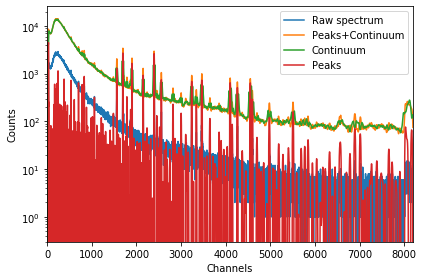

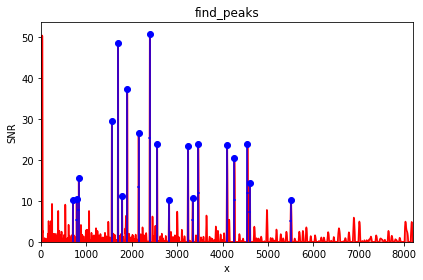

In [13]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-24hr.Spe"
spec_02_24 = Spectrum.from_file(spec_filename)
spec_02_24 = apply_ecal(spec_02_24,ecal_filename)
df6 = get_isotopes(spec_02_24)
df6

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-30min.Spe
[1561.5, 1697.5, 2397.5, 4261.5, 4753.5, 5406.5, 7014.5, 8028.5]
[23.753837590591427, 11.89760803077008, 10.995418867191571, 145.53291177070577, 23.745096484517173, 24.6822859309183, 37.485152908611276, 12.644374909891306]
Backround isotopes [['TL208'], [], [], [], [], ['BI214'], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166'], ['NA24', 'GE77', 'CD117', 'SB124', 'CS134'], ['K42'], ['KR87'], [], []]
Possible isotope br [[35.2+/-0.4, 2.842+/-0.014, 28.7+/-1.4, 28.7+/-1.4, 14.0+/-0.6, 96.0, 5.42+/-0.14], [16.8+/-1.0, 45.0, 1.2+/-0.08, 71.7+/-1.0, 14.7+/-0.8, 4.4+/-0.6, 70.67, 8.338+/-0.014, 6.14+/-0.1, 1.308+/-0.02, 3.75+/-0.09], [3.34+/-0.015, 1.07+/-0.06, 1.38+/-0.08, 83.6+/-1.2, 4.31+/-0.08,

,isotopes,energies,branching ratios
0,TL208,[509.94996889752707],[0.226]
1,SE Unidentified,[1730.382351928638],[[None]]
2,NA24,[1366.95060197529],[0.999936]
3,K42,[1523.1151617805715],[0.1808]
4,TE131,[775.3027575097531],[0.368]
5,BR82,[553.1174081932959],[0.7170000000000001]
6,BI214,[1730.382351928638],[0.0292]


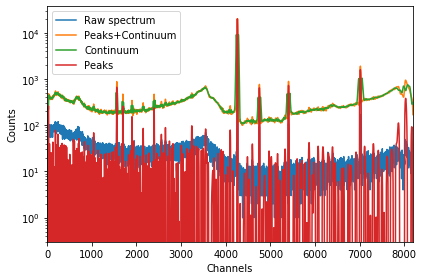

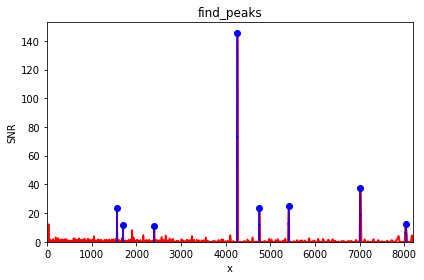

In [14]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-30min.Spe"
spec_03_30 = Spectrum.from_file(spec_filename)
spec_03_30 = apply_ecal(spec_03_30,ecal_filename)
df7 = get_isotopes(spec_03_30)
df7

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-3hr.Spe
[1557.5, 1692.5, 1897.5, 2145.5, 2391.5, 4090.5, 4250.5, 4740.5, 5392.5, 6997.5, 8029.5, 8165.5]
[33.80229117213132, 26.245147453251555, 19.733563332065476, 11.283325352672385, 26.1376012072614, 10.496557173386075, 206.5562344511388, 29.592064975274045, 35.01779765515224, 53.6694942903024, 32.77646747138803, 26.595522823696584]
Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166', 'W187'], ['BR82', 'SB124', 'TB160'], ['NA24', 'GE77', 'ZR97', 'CD117', 'SB124', 'CS134'], ['K42'], ['KR87'], [], [], []]
Possi

,isotopes,energies,branching ratios
0,BR82,"[551.5303699838927, 616.5989365694265, 695.316...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,ZN71,[508.6803383300045],[0.287]
2,K42,[1518.9888624361229],[0.1808]
3,NA24,[1363.459117914603],[0.999936]


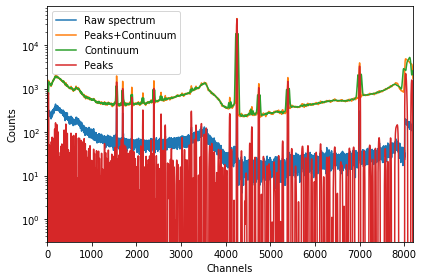

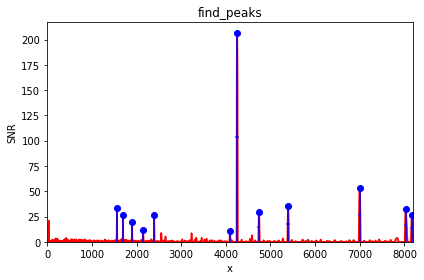

In [15]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-3hr.Spe"
spec_03_03 = Spectrum.from_file(spec_filename)
spec_03_03 = apply_ecal(spec_03_03,ecal_filename)
df8 = get_isotopes(spec_03_03)
df8

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-24hr.Spe
[536.5, 702.5, 1057.5, 1556.5, 1692.5, 1783.5, 2390.5, 2812.5, 3333.5, 3457.5, 4538.5, 5493.5]
[13.309610137600602, 11.057861958638155, 10.369277468611216, 31.225119090242963, 11.227352243138986, 11.03801181712899, 11.159958073048621, 12.486018857759914, 35.82917732782428, 22.971795224113944, 26.0168183870974, 11.565667148228776]
Backround isotopes [[], [], [], [], [], [], ['AC228'], [], [], [], [], []]
Possible isotopes [['FE59', 'GE75', 'GE77', 'SE75', 'IN114', 'XE125', 'XE129', 'ND149', 'ND149', 'TB160', 'HO166', 'YB169', 'HF179', 'TA182', 'PT197', 'U235'], ['TE131', 'XE125', 'XE135', 'BA131', 'BA131', 'ND149', 'EU152', 'EU154', 'LU177', 'HF179'], ['ZR97', 'RU105', 'BA133', 'CE143', 'ND149', 'GD159', 'HF179'], ['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['TE131', 'BA131'

,isotopes,energies,branching ratios
0,EU152,"[237.29680452204613, 1072.396310310044, 1111.7...","[0.0755, 0.1011, 0.1367]"
1,HF179,"[184.60713596985772, 349.97651738967795]","[0.215, 0.396]"
2,PA232,[508.3629306881238],[0.0542]
3,GE77,[551.5303699838927],[0.168]
4,AC228,[773.0809040165884],[0.0149]
5,SN125,[907.026928890224],[0.040999999999999995]
6,EU154,[580.414465395032],[0.0495]
7,K40,[1454.8725187762311],[0.1066]


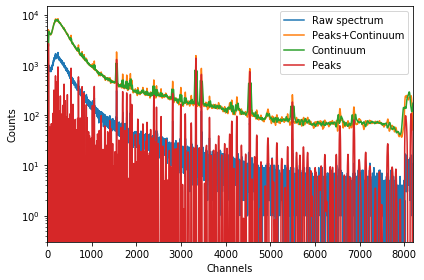

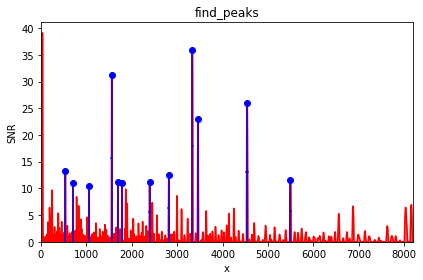

In [16]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-24hr.Spe"
spec_03_24 = Spectrum.from_file(spec_filename)
spec_03_24 = apply_ecal(spec_03_24,ecal_filename)
df9 = get_isotopes(spec_03_24)
df9

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-30min.Spe
[1561.5, 1697.5, 1902.5, 2151.5, 2397.5, 2559.5, 3240.5, 4100.5, 4262.5, 4597.5, 4753.5, 5406.5, 7015.5, 8029.5]
[23.896469345380282, 35.92415226654312, 28.883020699973333, 19.354171869744807, 37.44331545780069, 15.473618106464526, 15.297417158412225, 15.614040046205362, 156.33496548306127, 10.828142927246235, 25.73017286916033, 26.50349226760711, 40.307197912417365, 14.13015225383421]
Backround isotopes [['TL208'], [], [], [], [], [], [], [], [], [], [], ['BI214'], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187', 'RE188'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129', 'HO166'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166'], ['GA72', 'BR82', 'KR79',

,isotopes,energies,branching ratios
0,BR82,"[553.1174081932959, 618.1859747788297, 697.220...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,TL208,[509.94996889752707],[0.226]
2,SE Unidentified,[1730.382351928638],[[None]]
3,NA24,[1367.2680096171707],[0.999936]
4,K42,[1523.1151617805715],[0.1808]
5,BI214,[1730.382351928638],[0.0292]


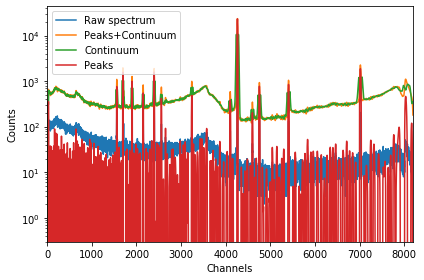

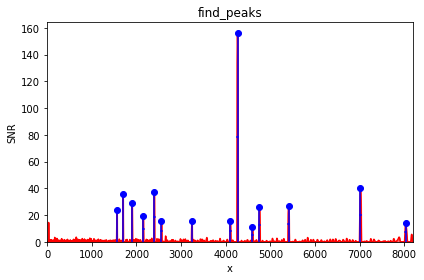

In [17]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-30min.Spe"
spec_04_30 = Spectrum.from_file(spec_filename)
spec_04_30 = apply_ecal(spec_04_30,ecal_filename)
df10 = get_isotopes(spec_04_30)
df10

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-3hr.Spe
[1556.5, 1692.5, 1895.5, 2144.5, 2389.5, 2550.5, 3228.5, 4087.5, 4247.5, 4581.5, 4737.5, 5389.5, 6993.5, 8028.5, 8165.5]
[32.134309895786146, 70.80070977814574, 53.09515178712867, 38.568462848743934, 71.8622112066057, 32.42935505776898, 30.766728179441223, 31.45858433463641, 202.34877220146095, 22.65791728530336, 28.940223563269377, 32.462078981618426, 51.52452838507903, 35.32663775775706, 29.168417674002235]
Backround isotopes [[], [], [], [], ['AC228'], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG108', 'AG110', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166',

,isotopes,energies,branching ratios
0,BR82,"[551.5303699838927, 615.9641212856652, 694.998...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,AC228,[772.7634963747079],[0.0149]
2,NA24,[1362.506894988961],[0.999936]
3,ZN71,[508.3629306881238],[0.287]
4,K42,[1518.0366395104809],[0.1808]


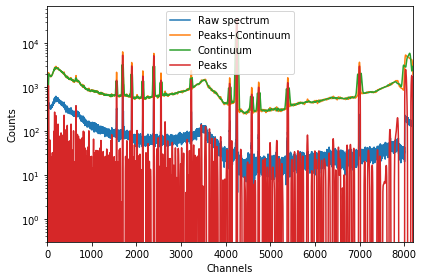

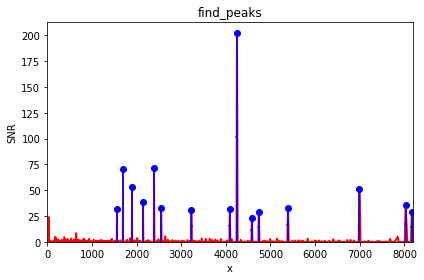

In [18]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-3hr.Spe"
spec_04_03 = Spectrum.from_file(spec_filename)
spec_04_03 = apply_ecal(spec_04_03,ecal_filename)
df11 = get_isotopes(spec_04_03)
df11

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-24hr.Spe
[380.5, 701.5, 783.5, 830.5, 1057.5, 1556.5, 1692.5, 1783.5, 1895.5, 2145.5, 2389.5, 2449.5, 2550.5, 2812.5, 3228.5, 3455.5, 4087.5, 4536.5, 5491.5]
[15.410271251043152, 10.347040664366357, 17.754067458774607, 19.95733998181281, 11.66972185021393, 30.388590550055408, 26.42521678426355, 11.826433528864843, 19.4711789106572, 13.741550814773838, 28.025491186201318, 10.335905445009113, 12.632751983359595, 11.36965091013464, 14.075655794559369, 30.416113345183238, 13.133835804178409, 25.858522895688807, 13.44093687846718]
Backround isotopes [[], [], [], ['TL208'], [], [], [], [], [], [], ['AC228'], [], [], [], [], [], [], [], []]
Possible isotopes [['FE59', 'ZN71', 'ZN71', 'SE75', 'RU105', 'TE131', 'XE127', 'BA131', 'CE141', 'YB177', 'LU177', 'LU177', 'HF179', 'HF181', 'W187', 'RE186', 'OS193', 'HG197', 'PA232', 'U235'], ['TE131', 'XE125', 'XE135', 'BA131', 'BA131', 'ND149', 'EU152', 'EU154', 'LU177', 'H

,isotopes,energies,branching ratios
0,BR82,"[551.5303699838927, 615.9641212856652, 695.316...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,TE131,"[135.09154383647586, 236.97939688016547, 791.8...","[0.049, 0.0732, 0.134, 0.11]"
2,BA133,"[263.00682351437905, 349.97651738967795]","[0.1769, 0.6204999999999999]"
3,PA232,[580.414465395032],[0.061799999999999994]
4,TL208,[277.9249826827697],[0.0631]
5,K40,[1454.2377034924698],[0.1066]
6,AC228,[772.7634963747079],[0.0149]
7,ZN71,[508.3629306881238],[0.287]
8,SN125,[907.026928890224],[0.040999999999999995]


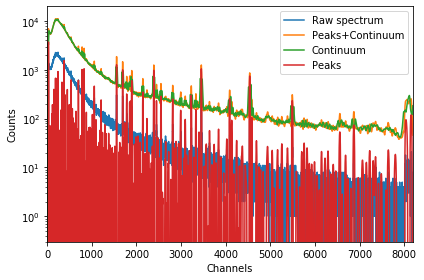

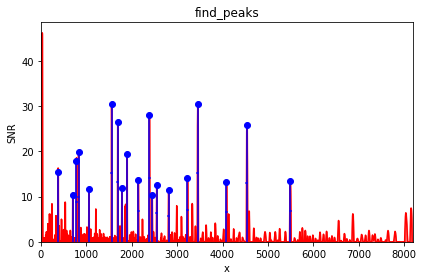

In [19]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-24hr.Spe"
spec_04_24 = Spectrum.from_file(spec_filename)
spec_04_24 = apply_ecal(spec_04_24,ecal_filename)
df12 = get_isotopes(spec_04_24)
df12

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-30min.Spe
[1561.5, 1697.5, 1902.5, 2151.5, 2397.5, 2559.5, 3239.5, 4100.5, 4261.5, 4595.5, 4752.5, 5406.5, 7014.5, 8028.5]
[22.871764271903054, 42.641349622185615, 32.96315486042653, 22.654824799327155, 44.28700067331334, 20.688638368336182, 19.38865810946756, 19.417090383288386, 146.35309045728818, 14.343750864991824, 29.001092822779146, 25.397348819106245, 39.06590824656879, 12.2547647853637]
Backround isotopes [['TL208'], [], [], [], [], [], [], [], [], [], [], ['BI214'], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187', 'RE188'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129', 'HO166'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166'], ['GA72', 'BR82', 'KR79', 

,isotopes,energies,branching ratios
0,BR82,"[553.1174081932959, 618.1859747788297, 697.220...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,TL208,[509.94996889752707],[0.226]
2,SE Unidentified,[1730.382351928638],[[None]]
3,NA24,[1366.95060197529],[0.999936]
4,K42,[1522.7977541386908],[0.1808]
5,BI214,[1730.382351928638],[0.0292]


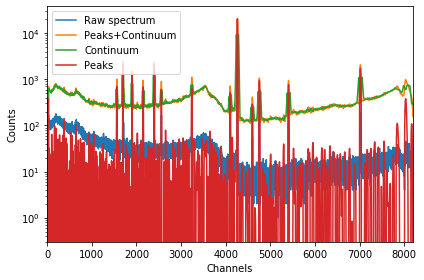

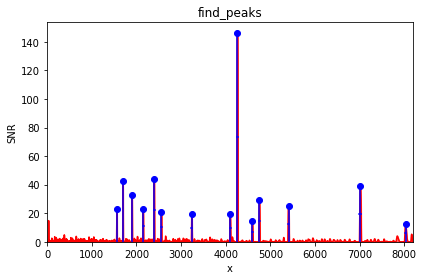

In [20]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-30min.Spe"
spec_05_30 = Spectrum.from_file(spec_filename)
spec_05_30 = apply_ecal(spec_05_30,ecal_filename)
df13 = get_isotopes(spec_05_30)
df13

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-3hr.Spe
[648.5, 1556.5, 1692.5, 1896.5, 2144.5, 2390.5, 2551.5, 3229.5, 4088.5, 4249.5, 4582.5, 4738.5, 5390.5, 6994.5, 8029.5, 8165.5]
[10.219498791856372, 28.807283257550896, 83.39677539709811, 62.724162670188726, 46.93913803296507, 84.36287667147742, 39.81399898312801, 38.19858154383733, 38.717231036505716, 180.93694783760088, 28.278885894090287, 29.43351490823929, 30.341010859584053, 46.60409733655079, 30.85247784442079, 24.89537687754051]
Backround isotopes [[], [], [], [], [], ['AC228'], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['BR82', 'SR85', 'XE133', 'CE143', 'LU177', 'LU177', 'TA182', 'TA182'], ['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129']

,isotopes,energies,branching ratios
0,BR82,"[551.5303699838927, 616.2815289275459, 694.998...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,LU177,[220.15679186049087],[0.359]
2,AC228,[773.0809040165884],[0.0149]
3,NA24,[1363.1417102727223],[0.999936]
4,ZN71,[508.3629306881238],[0.287]
5,K42,[1518.3540471523615],[0.1808]


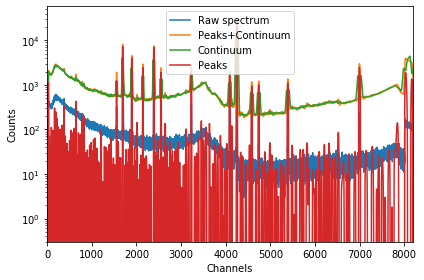

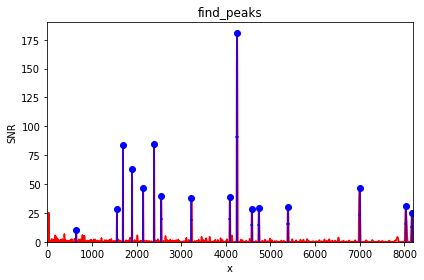

In [21]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-3hr.Spe"
spec_05_03 = Spectrum.from_file(spec_filename)
spec_05_03 = apply_ecal(spec_05_03,ecal_filename)
df14 = get_isotopes(spec_05_03)
df14

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-24hr.Spe
[381.5, 537.5, 703.5, 785.5, 831.5, 1059.5, 1212.5, 1559.5, 1785.5, 2454.5, 2817.5, 3460.5, 4544.5, 5498.5]
[25.456339303440476, 11.494004401138485, 11.782179273170932, 30.98285229513171, 28.329876242751464, 10.400263487061435, 14.333659166318313, 33.28863624817734, 10.64207741286748, 11.88312903890038, 12.021479734119378, 33.777097852202296, 26.437910258789252, 13.415857972855608]
Backround isotopes [[], ['U235'], [], [], ['TL208'], ['BI211'], [], [], [], [], [], [], [], []]
Possible isotopes [['FE59', 'ZN71', 'ZN71', 'SE75', 'RU105', 'TE131', 'XE127', 'BA131', 'CE141', 'YB177', 'YB177', 'LU177', 'LU177', 'HF179', 'HF181', 'W187', 'RE186', 'OS193', 'HG197', 'PA232', 'U235'], ['FE59', 'GE75', 'GE77', 'SE75', 'IN114', 'XE125', 'XE129', 'ND149', 'ND149', 'TB160', 'HO166', 'YB169', 'HF179', 'TA182', 'PT197', 'U235'], ['TE131', 'XE125', 'XE135', 'BA131', 'BA131', 'ND149', 'EU152', 'EU154', 'LU177', 'HF1

,isotopes,energies,branching ratios
0,HF179,"[135.40895147835653, 237.61421216392677, 263.6...","[0.271, 0.188, 0.113, 0.215]"
1,TE131,"[793.3949930969503, 1112.707080828887]","[0.134, 0.11]"
2,PA232,[581.0492806787934],[0.061799999999999994]
3,TL208,[278.2423903246504],[0.0631]
4,BI211,[350.6113326734393],[0.1291]
5,ZN71,[509.31515361376574],[0.287]
6,U235,[184.9245436117384],[0.572]
7,SN125,[908.6139670996273],[0.040999999999999995]
8,K40,[1456.7769646275149],[0.1066]


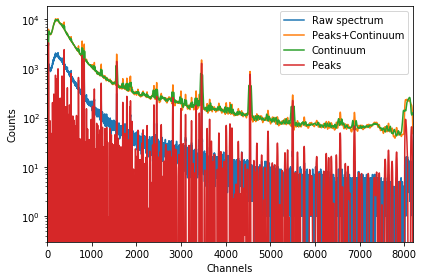

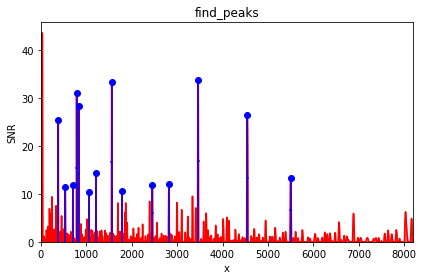

In [22]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-24hr.Spe"
spec_05_24 = Spectrum.from_file(spec_filename)
spec_05_24 = apply_ecal(spec_05_24,ecal_filename)
df15 = get_isotopes(spec_05_24)
df15

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-30min.Spe
[1561.5, 1697.5, 1901.5, 2397.5, 4261.5, 4752.5, 5406.5, 7014.5]
[16.811126960430485, 17.217476075126694, 11.772521493680017, 14.834652699825973, 102.17326166864888, 21.175763182167213, 17.921538493548685, 25.61606742984771]
Backround isotopes [['TL208'], [], [], [], [], [], ['BI214'], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166'], ['NA24', 'GE77', 'CD117', 'SB124', 'CS134'], ['K42'], ['KR87'], []]
Possible isotope br [[35.2+/-0.4, 2.842+/-0.014, 28.7+/-1.4, 28.7+/-1.4, 14.0+/-0.6, 96.0, 5.42+/-0.14], [16.8+/-1.0, 45.0, 1.2+/-0.08, 71.7+/-1.0, 14.7+/-0.8, 4.4+/-0.6, 70.67, 8.338+/-0.014, 6.14+/-0.1, 1.308+/-0.

,isotopes,energies,branching ratios
0,BR82,"[553.1174081932959, 775.3027575097531]","[0.7170000000000001, 0.836]"
1,TL208,[509.94996889752707],[0.226]
2,SE Unidentified,[1730.382351928638],[[None]]
3,NA24,[1366.95060197529],[0.999936]
4,ZN71,[617.8685671369492],[0.5579999999999999]
5,K42,[1522.7977541386908],[0.1808]
6,BI214,[1730.382351928638],[0.0292]


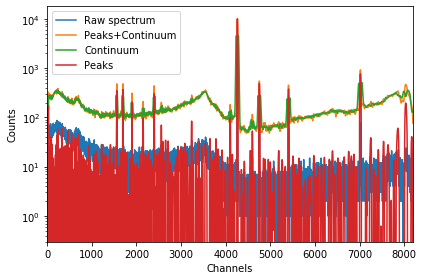

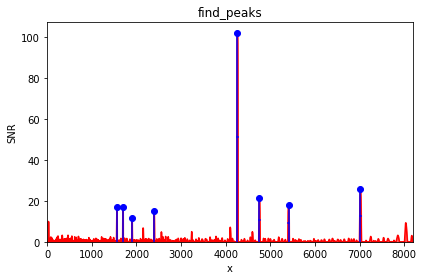

In [23]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-30min.Spe"
spec_06_30 = Spectrum.from_file(spec_filename)
spec_06_30 = apply_ecal(spec_06_30,ecal_filename)
df16 = get_isotopes(spec_06_30)
df16

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-3hr.Spe
[1563.5, 1699.5, 1904.5, 2153.5, 2399.5, 2561.5, 3243.5, 3469.5, 4105.5, 4266.5, 4758.5, 5412.5, 7022.5]
[21.516158349189666, 30.082612479267922, 22.922158845155227, 15.785620249134048, 30.331307917651962, 13.99435832979396, 12.530084209619014, 10.754794486801583, 13.63853157109885, 108.43754627284129, 18.081641375646903, 18.42502938155044, 28.656212147704522]
Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187', 'RE188'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129', 'HO166'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'EU152', 'HO166'], ['GA72', 'BR82', 'KR79', 'EU152', 'HO166'], ['GA72', 'BR82', 'SB124', 'BA131'], ['SC46', 'NI65', 'ZN65', 'TE131', 'TB160', 'TA182'], ['BR82', 'SB124']

,isotopes,energies,branching ratios
0,BR82,"[553.7522234770572, 618.8207900625911, 697.855...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,SE Unidentified,[1732.2867977799217],[[None]]
2,NA24,[1368.5376401846934],[0.999936]
3,K42,[1524.7021999899746],[0.1808]
4,TE131,[1115.563749605813],[0.11]


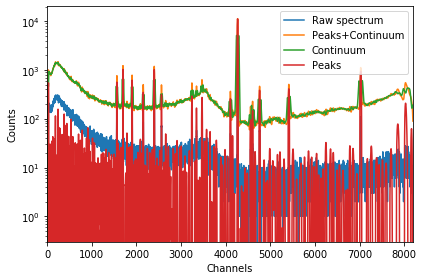

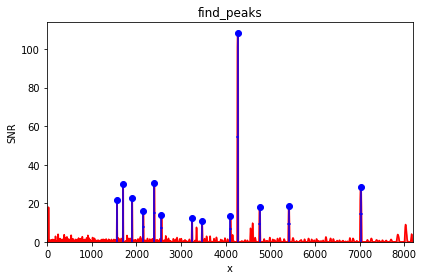

In [24]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-3hr.Spe"
spec_06_03 = Spectrum.from_file(spec_filename)
spec_06_03 = apply_ecal(spec_06_03,ecal_filename)
df17 = get_isotopes(spec_06_03)
df17

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-24hr.Spe
[245.5, 538.5, 704.5, 1060.5, 1560.5, 1787.5, 1870.5, 2819.5, 3340.5, 3463.5, 4547.5, 5503.5]
[14.257231608659733, 14.577628536833474, 14.931033906325057, 12.881305391099078, 34.84430909317433, 13.09395269473018, 12.82115487227089, 10.795488258865237, 19.331145341940733, 35.5571495342116, 26.09945686373731, 12.852412494415676]
Backround isotopes [[], ['RA226', 'U235'], ['PB212'], ['PB214', 'BI211'], [], [], [], [], [], [], [], []]
Possible isotopes [['SE75', 'CD107', 'CD117', 'TE131', 'ND147', 'ND149', 'SM153', 'GD153', 'GD153', 'DY165', 'YB169', 'LU177', 'HF180', 'TA182', 'RE186', 'PT195', 'AU198', 'PA232', 'PA232', 'PA232', 'U235', 'U235'], ['FE59', 'GE75', 'GE77', 'SE75', 'IN114', 'XE125', 'XE129', 'ND149', 'ND149', 'TB160', 'HO166', 'YB169', 'HF179', 'TA182', 'PT197', 'U235'], ['TE131', 'XE125', 'XE135', 'BA131', 'BA131', 'ND149', 'EU152', 'EU154', 'LU177', 'HF179'], ['ZR97', 'RU105', 'TE131', '

,isotopes,energies,branching ratios
0,ZN71,"[509.6325612556464, 581.6840959625547, 608.028...","[0.287, 0.275, 0.5579999999999999]"
1,EU152,"[1074.6181638032087, 1113.659303754529]","[0.1011, 0.1367]"
2,PB214,[350.9287403153199],[0.376]
3,BI211,[350.9287403153199],[0.1291]
4,RA226,[185.24195125361902],[0.0359]
5,TE131,[92.2415121825877],[0.0766]
6,U235,[185.24195125361902],[0.572]
7,DE:EU152,[92.2415121825877],[[None]]
8,SN125,[909.2487823833886],[0.040999999999999995]
9,K40,[1457.7291875531569],[0.1066]


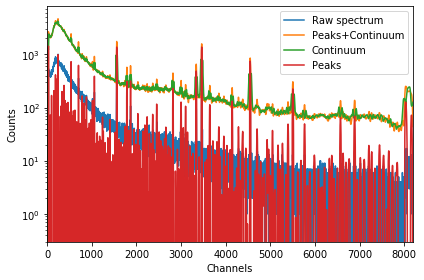

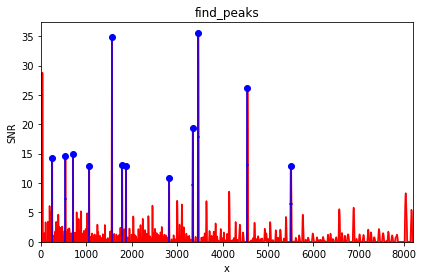

In [25]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-24hr.Spe"
spec_06_24 = Spectrum.from_file(spec_filename)
spec_06_24 = apply_ecal(spec_06_24,ecal_filename)
df18 = get_isotopes(spec_06_24)
df18

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-30min.Spe
[1561.5, 1696.5, 1901.5, 2151.5, 2397.5, 2558.5, 3239.5, 4100.5, 4260.5, 4752.5, 5405.5, 7014.5, 8027.5]
[23.046517047992022, 26.574830809005988, 22.783670949650272, 16.53832051649046, 30.91768013318684, 13.282148963436883, 12.843445619296382, 12.147584885786161, 148.07259654912312, 25.208548653970173, 24.61008100987851, 38.22325708419543, 12.600890063839465]
Backround isotopes [['TL208'], [], [], [], [], [], [], [], [], [], ['BI214'], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129', 'HO166'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166'], ['GA72', 'BR82', 'KR79', 'HO166'], ['GA72', 'BR82', 'SB124', 'BA

,isotopes,energies,branching ratios
0,BR82,"[552.8000005514152, 617.8685671369492, 697.220...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,TL208,[509.94996889752707],[0.226]
2,SE Unidentified,[1730.0649442867573],[[None]]
3,NA24,[1366.6331943334094],[0.999936]
4,K42,[1522.7977541386908],[0.1808]
5,BI214,[1730.0649442867573],[0.0292]


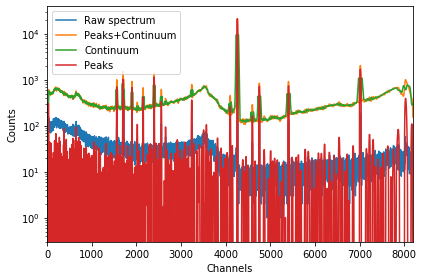

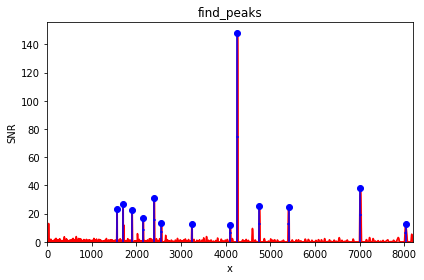

In [26]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-30min.Spe"
spec_07_30 = Spectrum.from_file(spec_filename)
spec_07_30 = apply_ecal(spec_07_30,ecal_filename)
df19 = get_isotopes(spec_07_30)
df19

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-3hr.Spe
[1561.5, 1696.5, 1901.5, 2021.5, 2150.5, 2396.5, 2558.5, 3238.5, 4099.5, 4260.5, 4595.5, 4751.5, 5404.5, 7012.5, 8027.5]
[21.836837651339746, 45.35116220667491, 41.31108859312889, 10.074622538347317, 29.129564781600333, 55.17576355946065, 26.10010269913737, 22.08161708733504, 23.96405343421285, 137.09962015792092, 17.284085482339844, 16.37339782782839, 23.239343991115838, 34.648364001660546, 12.437761356701735]
Backround isotopes [['TL208'], [], [], [], [], [], [], [], [], [], [], [], ['BI214'], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187'], ['AS76', 'RU105', 'AG110', 'TE131', 'CE143', 'ND149', 'HO166'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129', 'HO166'], ['GA72', 'GE77', 'G

,isotopes,energies,branching ratios
0,BR82,"[552.8000005514152, 617.8685671369492, 696.903...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,TL208,[509.94996889752707],[0.226]
2,SE Unidentified,[1729.7475366448766],[[None]]
3,NA24,[1366.6331943334094],[0.999936]
4,K42,[1522.4803464968102],[0.1808]
5,HO166,[655.9574841626275],[0.053899999999999997]
6,BI214,[1729.7475366448766],[0.0292]


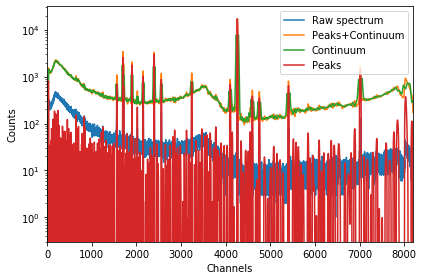

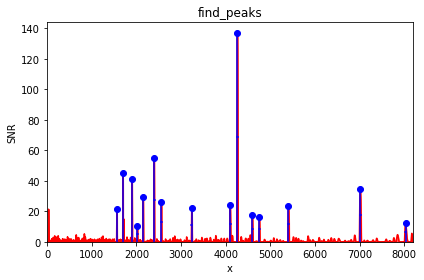

In [27]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-3hr.Spe"
spec_07_03 = Spectrum.from_file(spec_filename)
spec_07_03 = apply_ecal(spec_07_03,ecal_filename)
df20 = get_isotopes(spec_07_03)
df20

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-24hr.Spe
[381.5, 538.5, 704.5, 786.5, 832.5, 1060.5, 1560.5, 1787.5, 2456.5, 2819.5, 3464.5, 4548.5, 5504.5]
[10.629600119027032, 13.46055873910263, 11.509832370087548, 15.18130706752964, 19.85181555137197, 11.045183786406644, 33.65762739257577, 12.44305634940538, 10.91889537980722, 12.955852719920117, 31.308544283753296, 25.655533773536185, 12.41895774869228]
Backround isotopes [[], ['RA226', 'U235'], ['PB212'], [], [], ['PB214', 'BI211'], [], [], ['AC228'], [], [], [], []]
Possible isotopes [['FE59', 'ZN71', 'ZN71', 'SE75', 'RU105', 'TE131', 'XE127', 'BA131', 'CE141', 'YB177', 'YB177', 'LU177', 'LU177', 'HF179', 'HF181', 'W187', 'RE186', 'OS193', 'HG197', 'PA232', 'U235'], ['FE59', 'GE75', 'GE77', 'SE75', 'IN114', 'XE125', 'XE129', 'ND149', 'ND149', 'TB160', 'HO166', 'YB169', 'HF179', 'TA182', 'PT197', 'U235'], ['TE131', 'XE125', 'XE135', 'BA131', 'BA131', 'ND149', 'EU152', 'EU154', 'LU177', 'HF179'], ['GE

,isotopes,energies,branching ratios
0,ZN71,"[135.40895147835653, 509.6325612556464, 581.68...","[0.054000000000000006, 0.287, 0.275]"
1,PB214,[350.9287403153199],[0.376]
2,BI211,[350.9287403153199],[0.1291]
3,AC228,[794.0298083807115],[0.0425]
4,RA226,[185.24195125361902],[0.0359]
5,HF179,[263.959046440021],[0.113]
6,TE131,[1113.9767113964097],[0.11]
7,U235,[185.24195125361902],[0.572]
8,SN125,[909.2487823833886],[0.040999999999999995]
9,SE75,[278.559797966531],[0.2502]


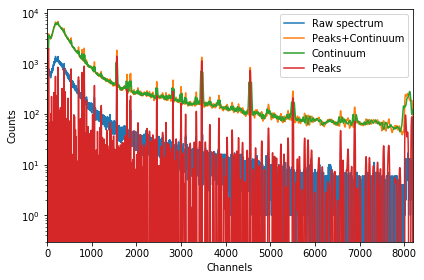

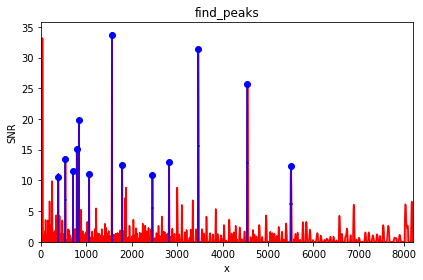

In [28]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-24hr.Spe"
spec_07_24 = Spectrum.from_file(spec_filename)
spec_07_24 = apply_ecal(spec_07_24,ecal_filename)
df21 = get_isotopes(spec_07_24)
df21

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-30min.Spe
[1560.5, 1696.5, 1901.5, 2151.5, 2396.5, 2558.5, 3238.5, 4099.5, 4260.5, 4594.5, 4751.5, 5405.5, 7012.5, 8027.5]
[17.657599469846364, 32.48622737307504, 26.09300067761763, 19.695183043000156, 36.02192765881258, 17.060553315792443, 14.216433282546776, 16.244561190552893, 112.3613613815299, 11.252313297380244, 27.197852368420335, 19.2029603351518, 28.50706711181939, 10.712269620394753]
Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], ['BI214'], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129', 'HO166'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166'], ['GA72', 'BR82', 'KR79', 'HO166'],

,isotopes,energies,branching ratios
0,BR82,"[552.8000005514152, 617.8685671369492, 697.220...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,SE Unidentified,[1730.0649442867573],[[None]]
2,NA24,[1366.6331943334094],[0.999936]
3,ZN71,[509.6325612556464],[0.287]
4,K42,[1522.4803464968102],[0.1808]
5,BI214,[1730.0649442867573],[0.0292]


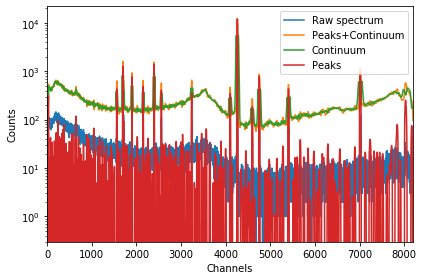

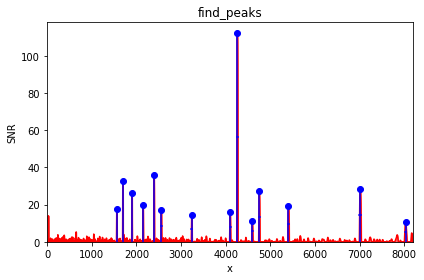

In [29]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-30min.Spe"
spec_08_30 = Spectrum.from_file(spec_filename)
spec_08_30 = apply_ecal(spec_08_30,ecal_filename)
df22 = get_isotopes(spec_08_30)
df22

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-3hr.Spe
[1559.5, 1695.5, 1899.5, 2148.5, 2394.5, 2555.5, 3235.5, 4095.5, 4256.5, 4590.5, 4746.5, 5398.5, 7006.5]
[15.804842254001162, 56.39507231172235, 44.740621308142096, 34.41174235565173, 59.135394724958125, 29.75108455732196, 27.852099646507135, 28.34190464139633, 97.53235364068277, 19.638248982718686, 17.597605144069888, 16.958467799854205, 24.676834791634846]
Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'W187', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166', 'W187'], ['GA72', 'BR82', 'KR79', 'HO166'], ['GA72', 'BR82', 'SB124', 'BA1

,isotopes,energies,branching ratios
0,BR82,"[552.4825929095347, 617.2337518531879, 696.268...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,SE Unidentified,[1727.8430907935926],[[None]]
2,NA24,[1365.363563765887],[0.999936]
3,ZN71,[509.31515361376574],[0.287]
4,K42,[1520.8933082874069],[0.1808]


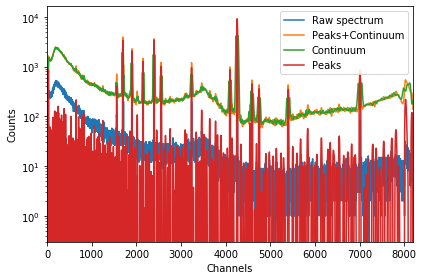

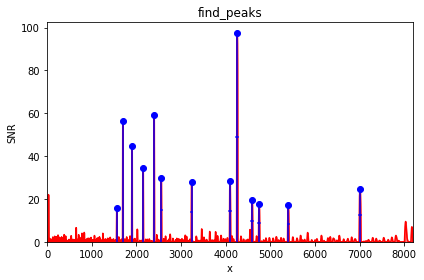

In [30]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-3hr.Spe"
spec_08_03 = Spectrum.from_file(spec_filename)
spec_08_03 = apply_ecal(spec_08_03,ecal_filename)
df23 = get_isotopes(spec_08_03)
df23

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-24hr.Spe
[245.5, 538.5, 704.5, 786.5, 832.5, 1560.5, 1788.5, 2456.5, 2820.5, 3463.5, 4548.5, 5506.5]
[10.262747665239951, 11.214921127901741, 12.700648857933622, 12.02830102306363, 14.37333058077979, 32.9672280089747, 11.939031624378483, 12.167976388324378, 12.269388147920209, 32.08171974495822, 26.062633092547102, 13.87203659558751]
Backround isotopes [[], ['RA226', 'U235'], ['PB212'], [], [], [], [], ['AC228'], [], [], [], []]
Possible isotopes [['SE75', 'CD107', 'CD117', 'TE131', 'ND147', 'ND149', 'SM153', 'GD153', 'GD153', 'DY165', 'YB169', 'LU177', 'HF180', 'TA182', 'RE186', 'PT195', 'AU198', 'PA232', 'PA232', 'PA232', 'U235', 'U235'], ['FE59', 'GE75', 'GE77', 'SE75', 'IN114', 'XE125', 'XE129', 'ND149', 'ND149', 'TB160', 'HO166', 'YB169', 'HF179', 'TA182', 'PT197', 'U235'], ['TE131', 'XE125', 'XE135', 'BA131', 'BA131', 'ND149', 'EU152', 'EU154', 'LU177', 'HF179'], ['GE75', 'GE77', 'SE75', 'MO93', 'RU105

,isotopes,energies,branching ratios
0,ZN71,"[509.6325612556464, 582.0015036044354]","[0.287, 0.275]"
1,TE131,"[92.2415121825877, 1113.659303754529]","[0.0766, 0.11]"
2,DE:TE131,[92.2415121825877],[[None]]
3,LU177,[278.559797966531],[0.13970000000000002]
4,AC228,[794.0298083807115],[0.0425]
5,RA226,[185.24195125361902],[0.0359]
6,HF179,[263.959046440021],[0.113]
7,U235,[185.24195125361902],[0.572]
8,SN125,[909.5661900252693],[0.040999999999999995]
9,K40,[1458.0465951950375],[0.1066]


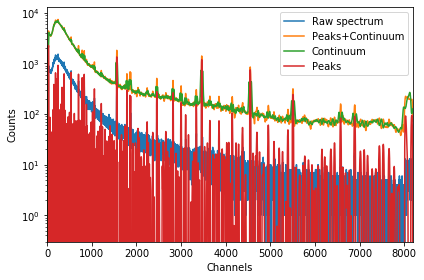

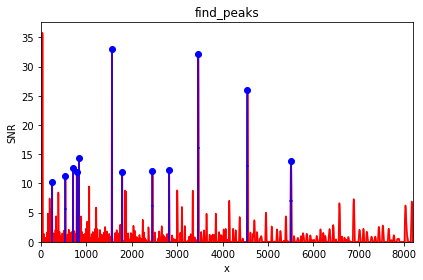

In [31]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-24hr.Spe"
spec_08_24 = Spectrum.from_file(spec_filename)
spec_08_24 = apply_ecal(spec_08_24,ecal_filename)
df24 = get_isotopes(spec_08_24)
df24

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-30min.Spe
[168.5, 197.5, 1560.5, 1696.5, 1901.5, 2150.5, 2396.5, 2557.5, 3238.5, 4098.5, 4259.5, 4751.5, 5404.5, 7012.5]
[14.90256487062341, 17.39282176886645, 13.69629150922859, 28.072197600527495, 21.237401819128575, 15.786649820748464, 29.555102974232096, 13.539702511545775, 11.842396984293003, 14.30711896796277, 93.32749904332564, 17.261779877717608, 16.229688905440785, 24.524198264196944]
Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], [], ['BI214'], []]
Possible isotopes [['SE75', 'AG108', 'TE131', 'XE133', 'BA133', 'BA133', 'ND149', 'SM153', 'GD153', 'HO166', 'HO166', 'HF181', 'TA182', 'TA182', 'TA182', 'TA182', 'W181', 'W187', 'W187', 'W187', 'W187', 'OS185', 'OS185', 'OS185', 'OS191', 'OS191', 'OS191', 'OS193', 'OS193', 'IR192', 'IR192', 'PT193', 'PT193', 'PT195', 'PT195', 'PT195', 'PT195', 'PT197', 'PT197', 'PT197', 'PT197', 'PT197', 'PT197', 'AU198', 'AU198', 'AU198', 'AU198', 'AU1

,isotopes,energies,branching ratios
0,BR82,"[552.8000005514152, 617.8685671369492, 696.903...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,AU198,"[67.80112375777742, 77.00594537231636]","[0.242, 0.049]"
2,SE Unidentified,[1729.7475366448766],[[None]]
3,NA24,[1366.3157866915287],[0.999936]
4,ZN71,[509.6325612556464],[0.287]
5,K42,[1522.4803464968102],[0.1808]
6,BI214,[1729.7475366448766],[0.0292]


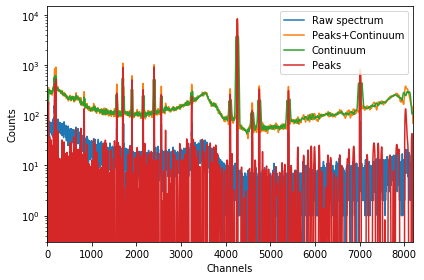

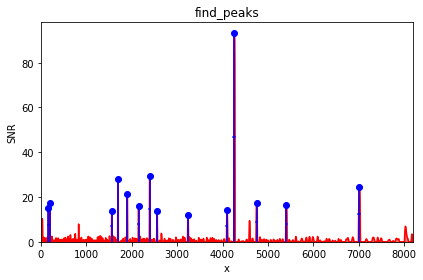

In [32]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-30min.Spe"
spec_09_30 = Spectrum.from_file(spec_filename)
spec_09_30 = apply_ecal(spec_09_30,ecal_filename)
df25 = get_isotopes(spec_09_30)
df25

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-3hr.Spe
[168.5, 197.5, 831.5, 1559.5, 1695.5, 1899.5, 2148.5, 2394.5, 2555.5, 3235.5, 4095.5, 4256.5, 4591.5, 4748.5, 5399.5, 7005.5]
[29.476376056543433, 33.39127169816417, 25.97002879549351, 14.936340285347201, 43.426408396246465, 34.43874789716831, 24.224405338601084, 46.25302977280281, 23.334973012759136, 22.7033080282956, 21.69800906515567, 77.08460807394444, 15.282913356394129, 10.509726719607642, 13.135354253937683, 19.96604632074002]
Backround isotopes [[], [], ['TL208'], [], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['SE75', 'AG108', 'TE131', 'XE133', 'BA133', 'BA133', 'ND149', 'SM153', 'GD153', 'HO166', 'HO166', 'HF181', 'TA182', 'TA182', 'TA182', 'TA182', 'W181', 'W187', 'W187', 'W187', 'W187', 'OS185', 'OS185', 'OS185', 'OS191', 'OS191', 'OS191', 'OS193', 'OS193', 'IR192', 'IR192', 'PT193', 'PT193', 'PT195', 'PT195', 'PT195', 'PT195', 'PT197', 'PT197', 'PT197', 'PT197', '

,isotopes,energies,branching ratios
0,BR82,"[552.4825929095347, 617.2337518531879, 696.268...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,AU198,"[67.80112375777742, 77.00594537231636]","[0.242, 0.049]"
2,TL208,[278.2423903246504],[0.0631]
3,NA24,[1365.363563765887],[0.999936]
4,ZN71,[509.31515361376574],[0.287]
5,K42,[1521.5281235711682],[0.1808]


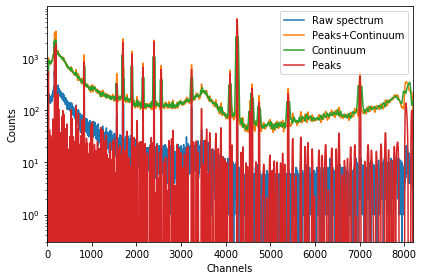

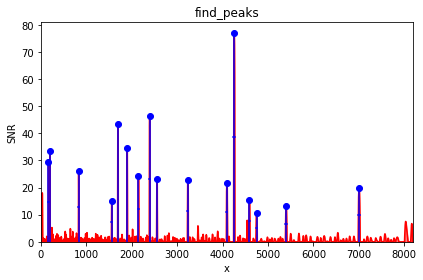

In [33]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-3hr.Spe"
spec_09_03 = Spectrum.from_file(spec_filename)
spec_09_03 = apply_ecal(spec_09_03,ecal_filename)
df26 = get_isotopes(spec_09_03)
df26

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-24hr.Spe
[245.5, 381.5, 537.5, 704.5, 786.5, 831.5, 1060.5, 1560.5, 1787.5, 1870.5, 2820.5, 3465.5, 4549.5, 5505.5]
[14.172444923307392, 10.465087992570812, 15.473441221804881, 15.634047195522527, 12.995163162301985, 61.23086721746234, 11.467752065855334, 34.18552608704303, 12.293623775221622, 11.295856515336581, 12.73610584278419, 26.135285186126445, 25.81455895556679, 11.662557488481035]
Backround isotopes [[], [], ['U235'], ['PB212'], [], ['TL208'], ['PB214', 'BI211'], [], [], [], [], [], [], []]
Possible isotopes [['SE75', 'CD107', 'CD117', 'TE131', 'ND147', 'ND149', 'SM153', 'GD153', 'GD153', 'DY165', 'YB169', 'LU177', 'HF180', 'TA182', 'RE186', 'PT195', 'AU198', 'PA232', 'PA232', 'PA232', 'U235', 'U235'], ['FE59', 'ZN71', 'ZN71', 'SE75', 'RU105', 'TE131', 'XE127', 'BA131', 'CE141', 'YB177', 'YB177', 'LU177', 'LU177', 'HF179', 'HF181', 'W187', 'RE186', 'OS193', 'HG197', 'PA232', 'U235'], ['FE59', 'GE75'

,isotopes,energies,branching ratios
0,ZN71,"[135.40895147835653, 509.6325612556464, 581.68...","[0.054000000000000006, 0.287, 0.275, 0.5579999..."
1,TE131,"[92.2415121825877, 1114.2941190382903]","[0.0766, 0.11]"
2,DE:TE131,[92.2415121825877],[[None]]
3,TL208,[278.2423903246504],[0.0631]
4,PB214,[350.9287403153199],[0.376]
5,BI211,[350.9287403153199],[0.1291]
6,HF179,[263.959046440021],[0.113]
7,U235,[184.9245436117384],[0.572]
8,SN125,[909.5661900252693],[0.040999999999999995]
9,K40,[1458.3640028369182],[0.1066]


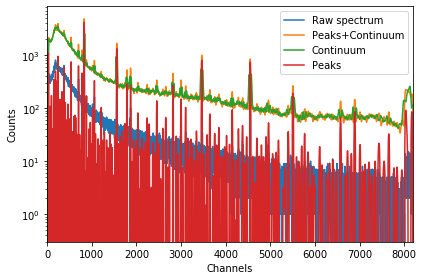

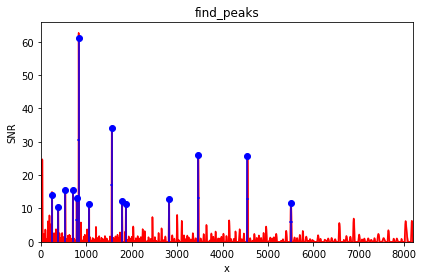

In [34]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-24hr.Spe"
spec_09_24 = Spectrum.from_file(spec_filename)
spec_09_24 = apply_ecal(spec_09_24,ecal_filename)
df27 = get_isotopes(spec_09_24)
df27

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-30min.Spe
[652.5, 1563.5, 1699.5, 1903.5, 2152.5, 2398.5, 2560.5, 3240.5, 3465.5, 4100.5, 4261.5, 4596.5, 5405.5, 7012.5, 8028.5]
[14.24660222860113, 57.50873761373957, 126.16952247201803, 92.30971351778062, 65.28067914312206, 126.78699285114966, 58.3101455354806, 52.81369035921591, 14.18206952875677, 55.62240432229234, 396.0822013408685, 42.79293393234236, 65.11898025699165, 103.03880197305352, 41.76595257852158]
Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], ['BI214'], [], []]
Possible isotopes [['BR82', 'SR85', 'XE133', 'CE143', 'LU177', 'LU177', 'TA182', 'TA182'], ['GE77', 'AS76', 'AS76', 'BR82', 'CD117', 'IN114', 'SB122', 'CS134', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'BR82', 'AG110', 'CD117', 'BA131', 'W187', 'W187', 'RE188'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129', 'HO166'], ['GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166'], ['GA72'

,isotopes,energies,branching ratios
0,BR82,"[553.7522234770572, 618.5033824207104, 697.537...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,LU177,[221.42642242801347],[0.359]
2,SE Unidentified,[1730.0649442867573],[[None]]
3,NA24,[1366.95060197529],[0.999936]
4,TE131,[1114.2941190382903],[0.11]
5,BI214,[1730.0649442867573],[0.0292]


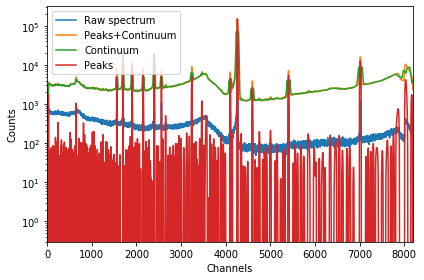

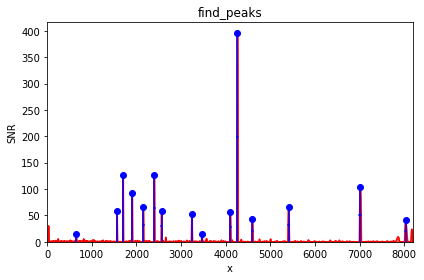

In [35]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-30min.Spe"
spec_10_30 = Spectrum.from_file(spec_filename)
spec_10_30 = apply_ecal(spec_10_30,ecal_filename)
df28 = get_isotopes(spec_10_30)
df28

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-3hr.Spe
[244.5, 650.5, 813.5, 1249.5, 1560.5, 1697.5, 1860.5, 1900.5, 2150.5, 2395.5, 2557.5, 3123.5, 3237.5, 3462.5, 3644.5, 3894.5, 4097.5, 4258.5, 4344.5, 4592.5, 5402.5, 5842.5, 6542.5, 7009.5, 8028.5]
[11.817302323929276, 33.60288248409246, 12.090870108754594, 10.654556072902041, 48.0316077617479, 223.10158245853708, 11.736785546042634, 162.49589298775635, 120.97967564738873, 216.12431265861014, 109.35287534959646, 10.239275370251045, 102.84290903000145, 69.82389368516813, 12.518609785007687, 10.597160456035711, 103.05758559061023, 319.7827747610269, 11.72160984287377, 77.601014779938, 51.646371942959355, 13.379188999431546, 11.416246551364306, 80.7374818973104, 31.5368505419038]
Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['BI214'], [], [], [], []]
Possible isotopes [['SE75', 'CD107', 'CD117', 'TE131', 'ND147', 'ND149', 'SM153', 'GD153', 'GD153', 

,isotopes,energies,branching ratios
0,BR82,"[553.1174081932959, 604.8548538198423, 617.551...","[0.7170000000000001, 0.43700000000000006, 0.43..."
1,LU177,"[91.92410454070705, 220.79160714425217, 272.52...","[0.1268, 0.359, 0.13970000000000002, 0.1762000..."
2,DE:TE131,[91.92410454070705],[[None]]
3,SE Unidentified,[1729.1127213611153],[[None]]
4,CD117,[2090.95743310506],[0.07440000000000001]
5,NA24,[1365.9983790496483],[0.999936]
6,ZN71,[509.6325612556464],[0.287]
7,CO60,[1171.1100869349273],[0.9984999999999999]
8,TE131,[1113.3418961126483],[0.11]
9,EU154,[1005.7407055151072],[0.1801]


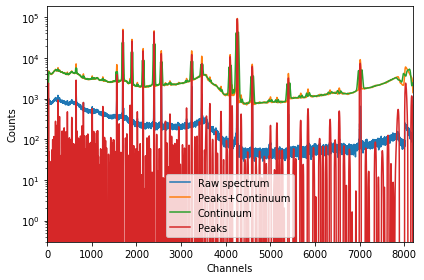

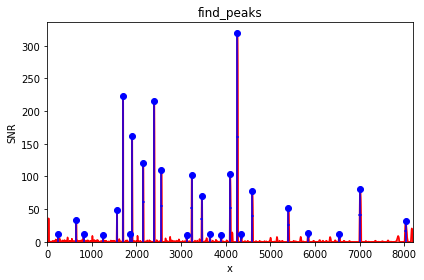

In [36]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-3hr.Spe"
spec_10_03 = Spectrum.from_file(spec_filename)
spec_10_03 = apply_ecal(spec_10_03,ecal_filename)
df29 = get_isotopes(spec_10_03)
df29

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-24hr.Spe
[245.5, 381.5, 552.5, 703.5, 785.5, 831.5, 1560.5, 2021.5, 2175.5, 2356.5, 2747.5, 2901.5, 3409.5, 3462.5, 3643.5, 4015.5, 4144.5, 4306.5, 4546.5, 4688.5, 5504.5]
[12.332126395064758, 19.750974198143815, 36.350491370026724, 10.368703916727632, 19.99168746020849, 15.219904451184366, 69.9703678911402, 53.363573979750086, 14.601726347685853, 17.37752902801986, 36.5978450689189, 20.17380174868811, 30.384294709413197, 258.5068921548633, 28.320560039585963, 27.751145936119016, 26.61022606620971, 21.918210558500753, 25.912713435063292, 14.353098111819731, 11.153098562421084]
Backround isotopes [[], [], [], [], [], ['TL208'], [], [], [], ['TL208'], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['SE75', 'CD107', 'CD117', 'TE131', 'ND147', 'ND149', 'SM153', 'GD153', 'GD153', 'DY165', 'YB169', 'LU177', 'HF180', 'TA182', 'RE186', 'PT195', 'AU198', 'PA232', 'PA232', 'PA232', 'U235', 'U235'], ['F

,isotopes,energies,branching ratios
0,TE131,"[92.2415121825877, 135.40895147835653, 189.685...","[0.0766, 0.049, 0.0728, 0.0732, 0.0418, 0.11]"
1,AG110,"[704.838261012248, 886.3954321679815, 935.2762...","[0.16690000000000002, 0.75, 0.35, 0.251, 0.1333]"
2,TL208,"[278.2423903246504, 762.2890441926463]","[0.0631, 0.0181]"
3,FE59,"[1096.5192910929738, 1288.8683220726496]","[0.565, 0.43200000000000005]"
4,CO60,"[1170.7926792930466, 1329.8139078752538]","[0.9984999999999999, 0.9998260000000001]"
5,DE:TE131,[92.2415121825877],[[None]]
6,K40,[1457.4117799112762],[0.1066]
7,ZN71,[509.6325612556464],[0.287]
8,HF179,[263.6416387981403],[0.113]


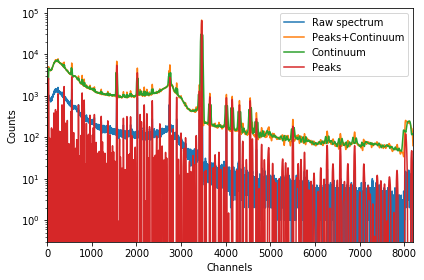

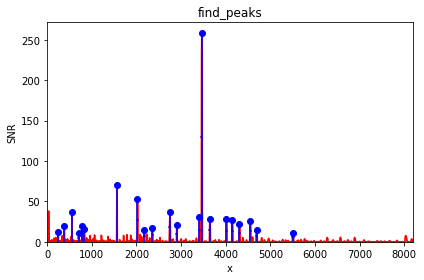

In [37]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-24hr.Spe"
spec_10_24 = Spectrum.from_file(spec_filename)
spec_10_24 = apply_ecal(spec_10_24,ecal_filename)
df30 = get_isotopes(spec_10_24)
df30

In [49]:
dataset = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30]

In [50]:
dataset[2]

,isotopes,energies,branching ratios
0,BR82,"[551.8477776257733, 616.9163442113072, 695.950...","[0.7170000000000001, 0.43700000000000006, 0.28..."
1,TE131,"[91.92410454070705, 654.6878535951049, 1112.38...","[0.0766, 0.0418, 0.11]"
2,ZN71,"[135.40895147835653, 508.9977459718851]","[0.054000000000000006, 0.287]"
3,GE77,[263.6416387981403],[0.5329999999999999]
4,TL208,[277.9249826827697],[0.0631]
5,K40,[1455.5073340599924],[0.1066]
6,SE Unidentified,[1726.2560525841893],[[None]]
7,AC228,[410.283969347002],[0.0192]
8,NA24,[1364.7287484821256],[0.999936]
9,U235,[184.9245436117384],[0.572]
